#### 1. PCA

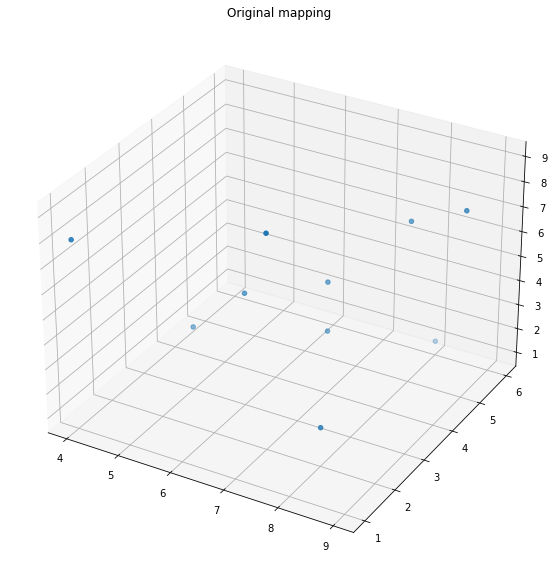

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
faces_array = []
n_components=2
plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
arr=[[7, 4 ,3],
[4, 1, 8],
[6, 3, 5],
[8, 6, 1],
[8, 5, 7],
[7, 2, 9],
[5, 3, 3],
[9, 5, 8],
[7, 4, 5],
[8, 2, 2]]
sklearn_pca = PCA(n_components=n_components)
X_new = sklearn_pca.fit_transform(arr)
X_new.shape
plt.title('Original mapping')
ax.scatter3D(list(zip(*arr))[0],list(zip(*arr))[1],list(zip(*arr))[2], 'green');

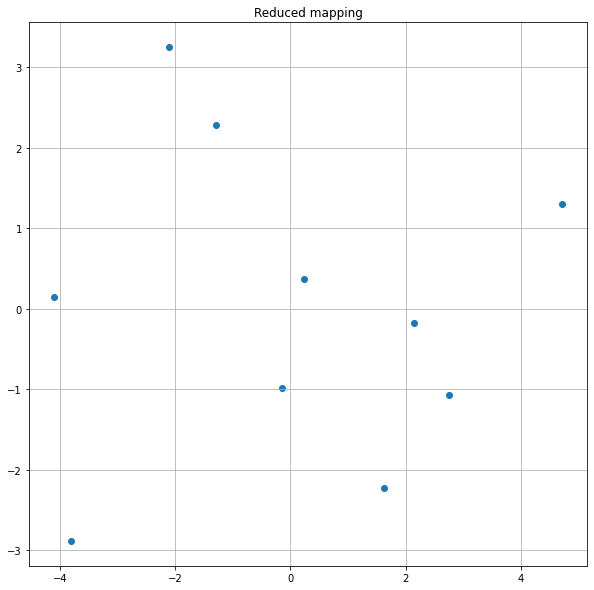

In [2]:
plt.figure(figsize=(10,10))
plt.scatter(list(zip(*X_new))[0],list(zip(*X_new))[1])
plt.grid()
plt.title("Reduced mapping");

#### 2. PCA limitations
1. Information loss, which is solved using a suitable number of principal componenets
2. Computationally expensive when increasing the dimensionality of the used dataset, for example when performing PCA on word embedding or biomedical applications, number of dimensions may reach 1000s, and the covariance matrix size increase in O(n^2)
3. Data standardization must be performed to reduce the variance scale

#### 3. Intensity Shading
K=5 since the human eye sees the difference in color for every 8 shades from {0,255} so 32 difference which means K=5

#### 4. Zhang-Seun 
There are 2 steps each have 4 proceduers
Step 1:
1. pixel is black and has 8 nieghbors
2. has more than one neighbor and less than or equal to 6
3. at least one neighbor north,east,south (4-connected) is white
4. at least one neighbor east,south,west (4-connected) is white
Step 2:
1. pixel is black and has 8 nieghbors
2. has more than one neighbor and less than or equal to 6
3. at least one neighbor north,east,west (4-connected) is white
4. at least one neighbor east,south,west (4-connected) is white

Iterates on these steps until no change occurs

#### 5. Zhang-Seun Implementation
[0 0 0 0 0 0 0 0]

[0 0 0 0 0 0 0 0]

[0 0 0 0 1 0 0 0]

[0 0 0 0 1 0 0 0]

[0 0 0 0 0 0 0 0]

[0 0 0 0 0 0 0 0]

[0 0 0 0 0 0 0 0]

[0 0 0 0 0 0 0 0]

#### 6. Chess board

8-Connected

----------------------

[2 1 1 1 1 1 1 1]

[2 1 X X X X X 1]

[1 1 X X X X 1 1]

[1 X X X X X X 1]

[1 1 1 X X X 1 1]

[2 2 1 X X 1 1 2]

[3 2 1 1 X 1 2 2]

[3 2 2 1 1 1 2 3]




4-Connected
----------------------

[3 2 1 1 1 1 1 2]

[2 1 X X X X X 1]

[2 1 X X X X 1 2]

[1 X X X X X X 1]

[2 1 1 X X X 1 2]

[3 2 1 X X 1 2 3]

[4 3 2 1 X 1 2 3]

[5 4 3 2 1 2 3 4]

#### 7. Algorithm

Choose randomely pixels from the given image pixel, when choosing a white pixel perform a dfs and add each of the pixels to a dictionary or a data structure element corresponding to island 0 initially for example, also prevent these pixels from being chosen again in the randomization choice, after a while the number of islands will converge on a number, itertate on every white pixel from top left to bottom right to make sure every white pixel has been chose before, when this procedure complete return number of islands from dictionary.